<H2> Assignment 20 - Linear Regression Model </H2>
<H2>Build the linear regression model using scikit learn in boston data to predict 'Price'
based on other dependent variable.</H2>

In [161]:
#Importing Libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [62]:
#Import Boston data
from sklearn.datasets import load_boston

In [63]:
# Load Boston data and assign it a dataframe
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [64]:
# Find dictionary keys as boston is a dictionary.
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [65]:
# shape of the boston data
boston.data.shape

(506, 13)

In [66]:
# read the records in the dataframe 
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [67]:
# print the column names of the Boston data set which is in feature_name dictionary.
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [68]:
# print  the description of the data
print( boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [69]:
# Assign the columns names to the dataframe columns.  
bos.columns = boston.feature_names

In [70]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [71]:
# Boston target contains Housing prices which is assigned to the Dataframe new column Price 
bos['PRICE'] =boston.target

In [72]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [73]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


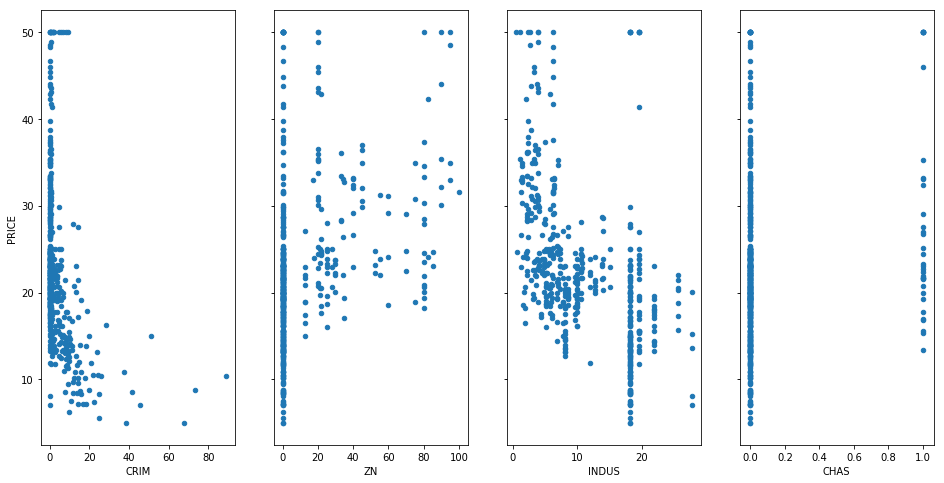

In [74]:
# visualize the relationship between the features and the PRICE using scatterplots for the first four features
# X  - Other features (independent variables)
# Y - Boston House PRICE (dependent variable  - also called Target in BOSTON dataset)

fig, axs = plt.subplots(1, 4, sharey=True)
bos.plot(kind='scatter', x='CRIM', y='PRICE', ax=axs[0], figsize=(16, 8))
bos.plot(kind='scatter', x='ZN', y='PRICE', ax=axs[1], figsize=(16, 8))
bos.plot(kind='scatter', x='INDUS', y='PRICE', ax=axs[2], figsize=(16, 8))
bos.plot(kind='scatter', x='CHAS', y='PRICE', ax=axs[3], figsize=(16, 8))


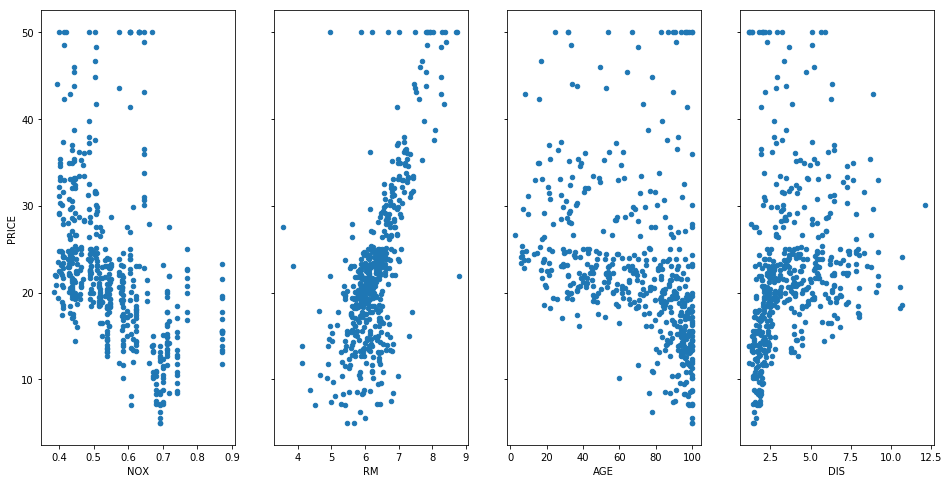

In [75]:
# visualize the relationship between the features and the PRICE using scatterplots for the second four features
fig, axs = plt.subplots(1, 4, sharey=True)
bos.plot(kind='scatter', x='NOX', y='PRICE', ax=axs[0], figsize=(16, 8))
bos.plot(kind='scatter', x='RM', y='PRICE', ax=axs[1], figsize=(16, 8))
bos.plot(kind='scatter', x='AGE', y='PRICE', ax=axs[2], figsize=(16, 8))
bos.plot(kind='scatter', x='DIS', y='PRICE', ax=axs[3], figsize=(16, 8))


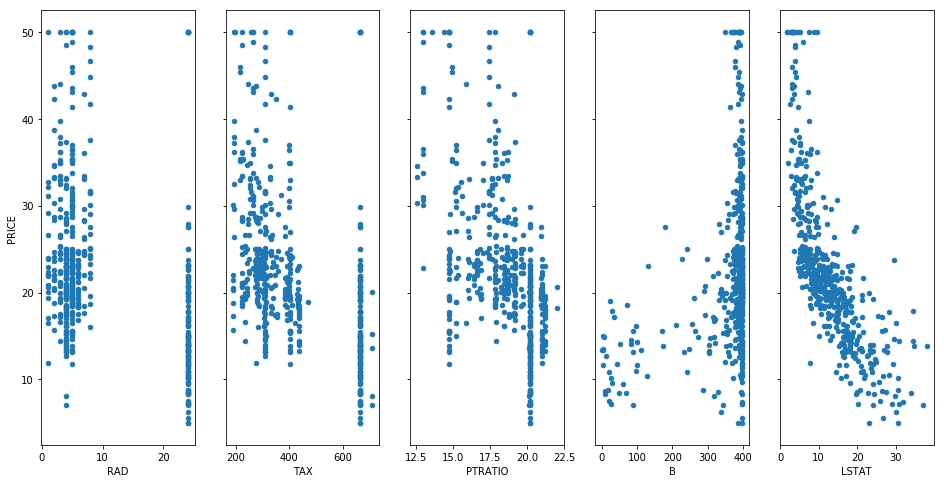

In [93]:
# visualize the relationship between the features and the PRICE using scatterplots for the remaining  features
fig, axs = plt.subplots(1, 5, sharey=True)
bos.plot(kind='scatter', x='RAD', y='PRICE', ax=axs[0], figsize=(16, 8))
bos.plot(kind='scatter', x='TAX', y='PRICE', ax=axs[1], figsize=(16, 8))
bos.plot(kind='scatter', x='PTRATIO', y='PRICE', ax=axs[2], figsize=(16, 8))
bos.plot(kind='scatter', x='B', y='PRICE', ax=axs[3], figsize=(16, 8))
bos.plot(kind='scatter', x='LSTAT', y='PRICE', ax=axs[4], figsize=(16, 8))


<H2> By seeing the Scatter plot for all the features with the Price, "RM" (no of rooms) correlation with PRICE for linear regression as it follows a linear trend. </H2>

In [134]:
# Import linear regression from sci-kit learn module
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [135]:
# Will assign the PRICE column to Y - Dependent Variable
Y = bos["PRICE"]
X = bos.drop('PRICE',axis = 1) # Dropping PRICE column as need to assign all the 13 feature columns to X 


In [136]:
# follow the usual sklearn pattern: import, instantiate, fit
#  using all 13 parameters to fit a linear regression model as we don't know which feature affects PRICE
lm.fit(X,Y) #returns Beta1 and Beta 0

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [137]:
# print intercept and coefficients
print("Estimated intercept",lm.intercept_)
print("Estimated Coefficient ", len(lm.coef_))

Estimated intercept 36.49110328036135
Estimated Coefficient  13


In [138]:
lm.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [139]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [140]:
lm.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [141]:
pd.DataFrame(list(zip(X.columns,lm.coef_)), columns=["Featured_names","Co_efficients"]) 

,Featured_names,Co_efficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


<H2> As you can see from the above table the 6th value in the Co-efficient(feature  - "RM") has the
higher correlation with the Price. The same we obsereved in the scatter plot also  </H2>

<H4> We will predict for the first 8 housing prices</H4>

In [142]:
lm.predict(X)[0:]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232,
       25.25940048, 23.00433994, 19.5347558 ])

In [143]:
# Calculate the Mean square error for all the features
mseall =np.mean((bos.PRICE-lm.predict(X))**2)
mseall

21.897779217687496

<H4> #Let us fit the Linear model for only one feature "RM"  and Calculate the Mean square error for all the features

In [147]:
# create X and Y with "RM" as the selected feature 
feature_cols = ['RM']
X = bos[feature_cols]
Y = bos["PRICE"]

In [148]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [149]:
# Calculate the Mean square error for all the features
mseRM =np.mean((bos.PRICE-lm.predict(X))**2)
mseRM

43.60055177116958

<H2> The mean square error increased when we took a single feature "RM". We cannot predict the Housing price from the single variable or feature</H2>

<H2>As we cannot predict using Linear Model just by taking a single feature. We will have use Cross Validation for the building the correct model</H2> 